In [33]:
import pandas as pd
import os
from pathlib import Path
import sys
sys.path.append("./../../")
from scripts.framework.utils import *

project_root = "../../"

In [34]:
import json

In [35]:
import matplotlib.pyplot as plt
from typing import List, Union, Any, Tuple, Dict
import numpy as np
# plot scatter plot of utility and semantic metric for each cluster
def plot_pareto_points(pareto_points:List, est_pareto_points:List=None, est_pareto_points2:List=None, explored_points:List=None, points_df=None) -> Tuple:
    """
    Plot the estimated and ground truth Pareto fronts.
    Args:
        pareto_points (List): Ground truth Pareto front
        est_pareto_points (List): Estimated Pareto front
    """
    # Sort the points for plotting
    #pareto_points = sorted(pareto_points, key=lambda x: x[1])
    #est_pareto_points = sorted(est_pareto_points, key=lambda x: x[1])
    # Plot the Pareto front
    pareto_points = np.array(pareto_points)
    #est_pareto_points = np.array(est_pareto_points)
    #datapoints = np.array(datapoints)
    # Set size of the plot
    fig, ax = plt.subplots(figsize=(6, 4))
    #f, ax = plt.subplots()
    #ax.scatter(datapoints[0], datapoints[1], c='gray', label='Data Points', alpha=0.3)
    markers = ["." , "," , "o" , "v" , "^" , "<", ">"]
    #for cluster in points_df['Cluster'].unique():
    #    cluster_points = points_df[points_df['Cluster'] == cluster]
    #    marker_index = int(cluster % len(markers))
    #    ax.scatter(cluster_points['Semantic'], cluster_points['Utility'], label=cluster, color=colors[cluster], alpha=0.5, marker=markers[marker_index])

    #ax.scatter(explored_points[0], explored_points[1], c='gray', label='Explored Points', marker='x',)
    ax.plot(pareto_points[1], pareto_points[0], '+', c='red', label='Ground Truth', markersize=10)
    
    if est_pareto_points is not None:
        ax.plot(est_pareto_points[1], est_pareto_points[0], 's', c='green', label='Q-learning', markersize=10)
    
    if est_pareto_points2 is not None:
        ax.plot(est_pareto_points2[1], est_pareto_points2[0], 'v', c='purple', label='Random', markersize=10)
    
    ax.legend(bbox_to_anchor=(1, 1.2),ncol=2, fontsize=12)
    ax.set_ylabel('Semantic', fontsize=14)
    ax.set_xlabel('Utility', fontsize=14)
    #ax.set_title('Pareto Curve Estimated vs. Ground-Truth', fontsize=14)
    return fig, ax

In [42]:
dataset = 'bank'
exp_config = json.load(open(os.path.join(project_root, 'data', dataset, f'{dataset}.json')))
attributes = list(exp_config['attributes'].keys())
attributes

['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Years of Credit History']

In [43]:
truth_dir = os.path.join(project_root, "truth", 'single_attrs')
utility_function = 'spearman'

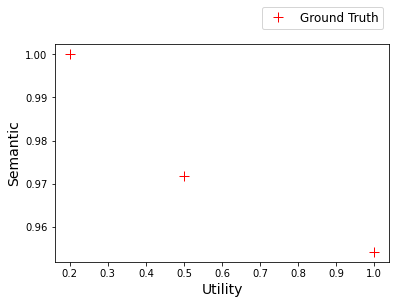

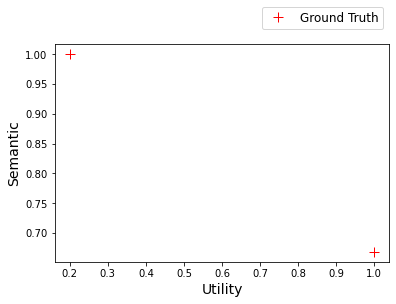

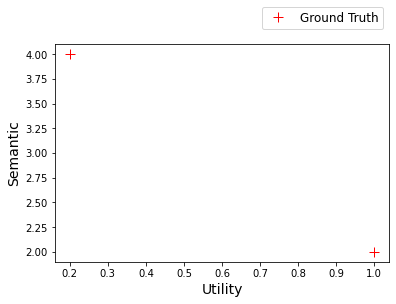

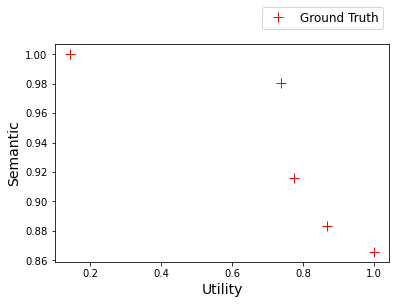

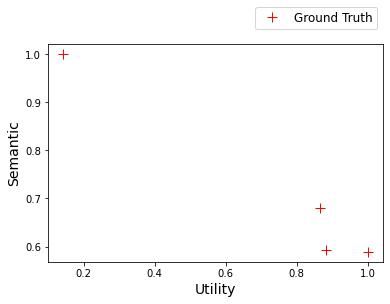

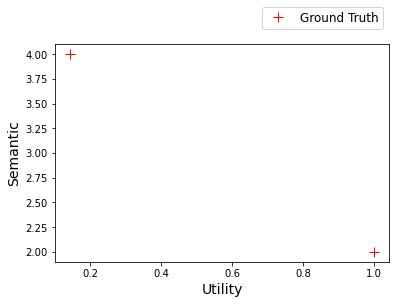

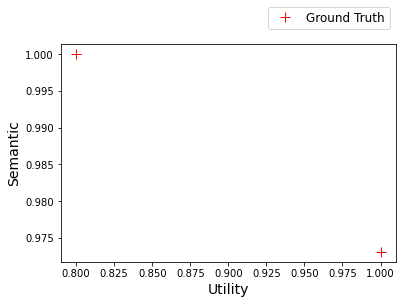

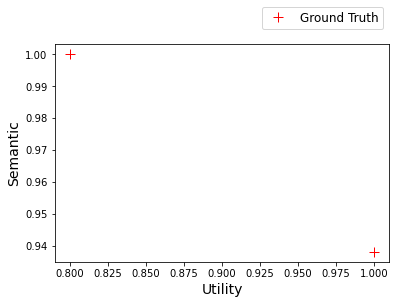

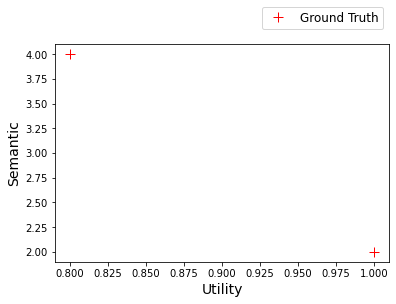

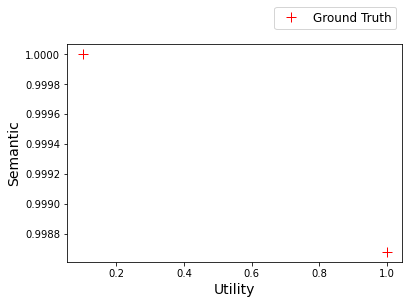

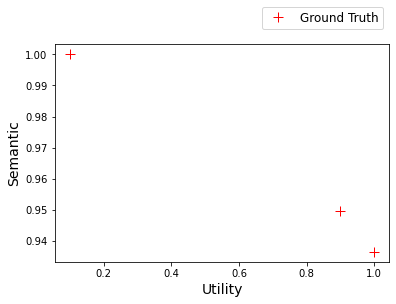

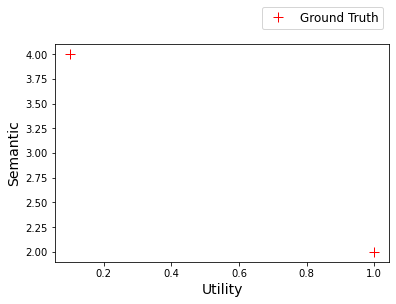

In [44]:
# Find the pareto front

for attr in attributes:
    gt_filepath = os.path.join(truth_dir, f'{dataset}.{attr}.{utility_function}.csv')
    if not os.path.exists(gt_filepath):
        raise FileNotFoundError(f"Ground truth data not found at {gt_filepath}. Please ensure the file exists.")
    df = pd.read_csv(gt_filepath)
    semantic_measures = ['KLDiv', 'l2_norm', 'gpt_semantics'] #'l2_norm', 'KLDiv', 
    for semantic_metric in semantic_measures:
        gt_df = df.copy()
        datapoints = [np.array(gt_df[semantic_metric].values), np.array(gt_df['utility'].values)]
        lst = compute_pareto_front(datapoints)
        gt_df["Estimated"] = 0
        gt_df.loc[lst, "Estimated"] = 1
        gt_df["Explored"] = 1
        
        # Save the results
        gt_df = gt_df[gt_df['Estimated'] == 1]
        # remove duplicates
        gt_df = gt_df.drop_duplicates(subset=[semantic_metric, 'utility'])
        points = [np.array(gt_df[semantic_metric].values), np.array(gt_df['utility'].values)]
        fig, ax = plot_pareto_points(points)
        plt.show()
        #gt_df.to_csv(os.path.join(project_root, "truth", f'{dataset}.{attr}.{utility_function}.{semantic_metric}.csv'), index=False)